In [1]:
import caffe
import lmdb
import numpy as np
import matplotlib.pyplot as plt
from caffe.proto import caffe_pb2
from caffe.io import datum_to_array, array_to_datum
import cv2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
%matplotlib inline

In [3]:
path="/vol/pfc/data/datasets/Sequence_2_4_5_lmdb"

lmdb_env = lmdb.open(path)
lmdb_txn = lmdb_env.begin()
lmdb_cursor = lmdb_txn.cursor()
datum = caffe.proto.caffe_pb2.Datum()

In [6]:
model_path="../data/models/train_25_batch/train_sequence_2_4_5_25_lmdb_iter_35000.caffemodel"
deploy_path="/vol/pfc/prototxt/sequence_2_4_5/train_sequence_25_lmdb_deploy.prototxt"
caffe.set_mode_cpu()
net = caffe.Net(deploy_path,model_path, caffe.TEST)

In [27]:
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
#transformer.set_mean('data', np.load('/vol/pfc/data/means/Sequence1_mean.npy').mean(1).mean(1))
transformer.set_transpose('data', (2,0,1))

In [4]:
cnt=0
data_array=[]
#print len(lmdb_cursor)
for key, value in lmdb_cursor:
    datum.ParseFromString(value)
    label = datum.label
    data = caffe.io.datum_to_array(datum)
   # print label
    #print data.shape
    image= np.transpose(data,(1, 2, 0))
    data_array+=[(image,label)]
    #plt.imshow(image)
    #plt.show()
    #cnt+=1
    #if (cnt>10):
    #    break
    
lmdb_env.close()

In [5]:
print data_array[0][0].shape
#image.shape
#image_transform=transformer.preprocess('data', image)
#image_transform.shape
#print image.shape
len(data_array)

(320, 240, 3)


4579

In [ ]:
output_images=[]
size=0
cnt=0
path="/vol/pfc/data/sequences/Sequence_2_4_5_Oversample/sequence_"
for img,label in data_array:
    if (int(label)!=1):
        for a,b in [(i,label)  for i in caffe.io.oversample([img],(230, 310))]:
            image_path=path+str(cnt)+'.png'
            #print " a shape"+str(a.shape) 
            matplotlib.image.imsave(image_path, a)
            output_images+=[(path+str(cnt)+'.png',label)]
            cnt+=1
            #break
            
    a=np.array((cv2.resize(img, (310, 2300))))
        #print a.shape
    image_path=path+str(cnt)+'.png'
    matplotlib.image.imsave(image_path,a)
    output_images+=[(path+str(cnt)+'.png',label)]
    cnt+=1
        #break
                        
print size

In [ ]:
## data_array[0][0]
print len(output_images)
np.transpose(data_array[0][0],(2,0,1)).shape

Transformo las imagenes y las salbo en una bbdd

In [ ]:

output_path='/vol/pfc/data/datasets/Sequences_2_4_5_Oversample'

file_ = open(output_path, 'w')

for image,clase in output_images:
    file_.write(''+str(image)+' '+str(clase)+'\n')

file_.close()

In [55]:

map_size = size * 10

env = lmdb.open('mylmdb', map_size=map_size)
i=0
with env.begin(write=True) as txn:
    # txn is a Transaction object
   # for i in range(N):
    
    for img,label in data_array:
        
        if (int(label)!=1):
            for data_img in  np.array([i  for i in caffe.io.oversample([img],(310, 230))] ) :
                datum = caffe.proto.caffe_pb2.Datum()
                X=np.transpose(data_img,(2,0,1))
                datum.channels = X.shape[0]
                datum.height = X.shape[1]
                datum.width = X.shape[2]
                datum.data = X.tobytes()  # or .tostring() if numpy < 1.9
                datum.label = int(label)
                
                #str_id ='{num:08}'.format(num=1+i)
                str_id = str(i).rjust(8, "0")
                txn.put(str_id.encode('ascii'), datum.SerializeToString())
                i+=1
     
        else:
            datum = caffe.proto.caffe_pb2.Datum()
            X=np.transpose(img,(2,0,1))
            datum.channels = X.shape[0]
            datum.height = X.shape[1]
            datum.width = X.shape[2]
            datum.data = X.tobytes()  # or .tostring() if numpy < 1.9
            datum.label = int(label)
            str_id = str(i).rjust(8, "0")
            txn.put(str_id.encode('ascii'), datum.SerializeToString())
            i+=1
            

        # The encode is only essential in Python 3
        

BadValsizeError: mdb_put: MDB_BAD_VALSIZE: Unsupported size of key/DB name/data, or wrong DUPFIXED size

In [51]:
i=100
str_id ='{num:08}'.format(num=i)

str(i).rjust(8, "0")


'00000100'

In [ ]:
len(output_images)
cnt=0
for img,label in output_images:
    print str(img.shape) +" "+str(label)
    cnt+=1
    if(cnt>100):
        break

In [32]:
print image.shape
input_oversampled.shape

(240, 320, 3)


(10, 230, 310, 3)

(230, 310)


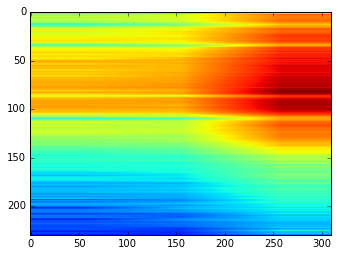

(310, 230, 3)
(230, 3, 310)


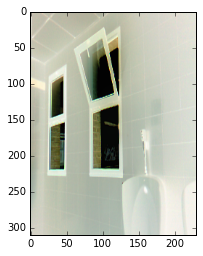

(310, 230, 3)
(230, 3, 310)


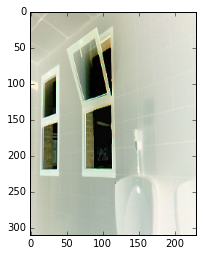

(310, 230, 3)
(230, 3, 310)


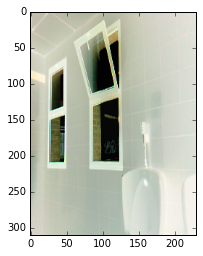

(310, 230, 3)
(230, 3, 310)


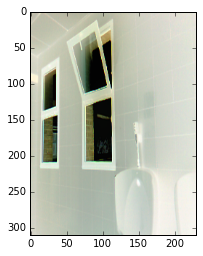

(310, 230, 3)
(230, 3, 310)


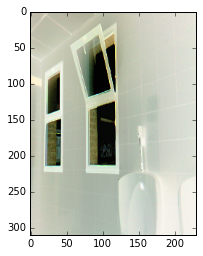

(310, 230, 3)
(230, 3, 310)


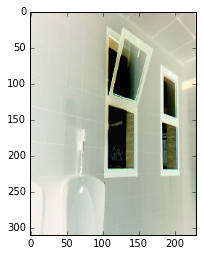

(310, 230, 3)
(230, 3, 310)


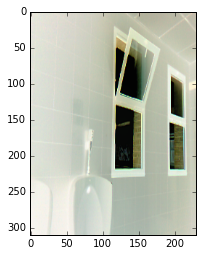

(310, 230, 3)
(230, 3, 310)


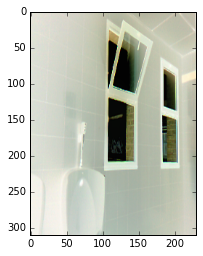

(310, 230, 3)
(230, 3, 310)


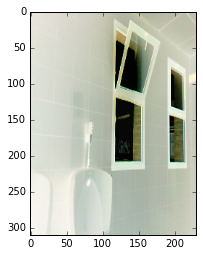

(310, 230, 3)
(230, 3, 310)


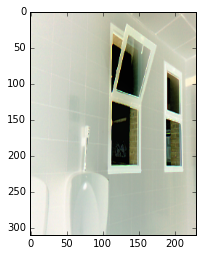

In [11]:

first_imge=cv2.resize(output_images[0][0], (310, 230))
print first_imge.shape
plt.imshow(first_imge)

plt.show()
input_oversampled=output_images
for i in input_oversampled:
    sh_image= np.transpose(i,(1, 2, 0))
    print i.shape
    print sh_image.shape
    plt.imshow(i[:,:,::1])
    plt.show()
    


In [ ]:

input_oversampled = caffe.io.oversample([data_array],(320, 240))